In [71]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import functools as ft
import squarify

# stast packages and data cleaning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pd.set_option('display.max_columns', None)

In [3]:
#handling warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#see type of data in each columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
#see if there is missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#drop missing values
data_clean = data.dropna()

In [10]:
data_clean.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
#changeDt_Customer to dates
data_clean['Dt_Customer']= pd.to_datetime(data_clean['Dt_Customer'])
dates =[]
for i in data_clean['Dt_Customer']:
    i=i.date()
    dates.append(i)

In [17]:
print("The newest Custumer's Enrolement date in the record is ", max(dates))
print("The Oldes Custumer's Enrolement date in the record is ", min(dates))

The newest Custumer's Enrolement date in the record is  2014-12-06
The Oldes Custumer's Enrolement date in the record is  2012-01-08


In [18]:
# create colums for number of Days since custmers has been registerd in the data base
days =[]
max_date= max(dates)
for i in dates:
    delta = max_date-i
    days.append(delta)
data_clean['No_days']= days
data_clean['No_days']=pd.to_numeric(data_clean['No_days'])

In [19]:
data_clean['No_days']

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: No_days, Length: 2216, dtype: int64

In [20]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
#find age of the custmers
data_clean['Costmer_age']= 2016-data_clean['Year_Birth']

#total spend on buying items
data_clean['Ammount_spent']= data_clean['MntWines'] \
+ data_clean['MntFruits'] + data_clean['MntFishProducts'] \
+ data_clean['MntMeatProducts'] + data_clean['MntSweetProducts'] + data_clean['MntGoldProds']

In [23]:
data_clean['Ammount_spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Ammount_spent, Length: 2216, dtype: int64

In [24]:
#cleaning maritial status
data_clean['Living_with'] = data_clean['Marital_Status'].replace({'Married':'Partner',
                                                                'Together':'Partner',
                                                                 'Single':'Alone',
                                                                 'Divorced': 'Alone',
                                                                 'Widow':'Alone',
                                                                 'Absurd':'Alone',
                                                                 'YOLO':'Alone'})


data_clean['Children']= data_clean['Kidhome']+ data_clean['Teenhome']
data_clean['Familiy_size']= data_clean['Living_with'].replace({"Alone":1,"Partner":2})+ data_clean['Children']


#parents or not
data_clean['Is_parent'] = np.where(data_clean['Children'] >0,1,0)

#cleaing eductaion
data_clean['Education']= data['Education'].replace({'Basic': 'Undergraduate',
                                                   '2n Cycle':'Undergraduate',
                                                   'Graduation': 'Graduate',
                                                   'PhD':'Postgraduate',
                                                   'Master': 'Postgraduate'})

#rename columes
data_clean=data_clean.rename(columns={"MntWines": "Wines",
                                      "MntFruits":"Fruits",
                                      "MntMeatProducts":"Meat",
                                      "MntFishProducts":"Fish",
                                      "MntSweetProducts":"Sweets",
                                      "MntGoldProds":"Gold"})

columns_todrop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

data_clean= data_clean.drop(columns_todrop, axis=1)

In [25]:
data_clean.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_days,Costmer_age,Ammount_spent,Living_with,Children,Familiy_size,Is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,59,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,62,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,51,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,32,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,35,422,Partner,1,3,1


In [26]:
data_clean.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'No_days',
       'Costmer_age', 'Ammount_spent', 'Living_with', 'Children',
       'Familiy_size', 'Is_parent'],
      dtype='object')

In [69]:
#create a function to group two items
#this fucntion will help us to group any two item and return Pandas daraframe
def two_grouper(item1, item2):
    df = data_clean.groupby(item1)[item2].sum().reset_index()
    return(df)

In [28]:
#lets start with EDA
Edu_income=two_grouper('Education','Income')
Edu_Aspent=two_grouper('Education','Ammount_spent')
Edu_bynum=data_clean['Education'].value_counts().reset_index()
Edu_bynum.rename(columns={'index':'Education','Education':'Edu_bynum'}, inplace=True)
df_edus = [Edu_bynum,Edu_income,Edu_Aspent]

df_edus=ft.reduce(lambda left, right: pd.merge(left, right, on='Education'), df_edus)
df_edus

,Education,Edu_bynum,Income,Ammount_spent
0,Graduate,1116,58835937.0,693802
1,Postgraduate,846,46320796.0,548074
2,Undergraduate,254,10623176.0,103403


Text(0.5, 1.0, 'Ammount Spent per Education level')

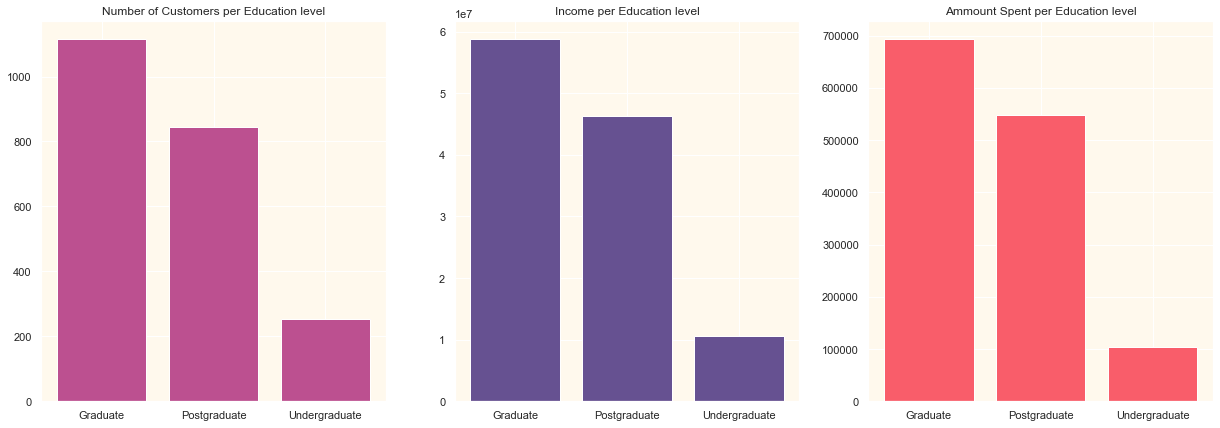

In [167]:
fig , ax = plt.subplots(1,3, figsize=(21,7))
ax[0].bar(df_edus['Education'],df_edus['Edu_bynum'], color='#bc5090')
ax[1].bar(df_edus['Education'], df_edus['Income'], color='#665191')
ax[2].bar(df_edus['Education'], df_edus['Ammount_spent'], color='#f95d6a')
ax[0].set_title('Number of Customers per Education level')
ax[1].set_title('Income per Education level')
ax[2].set_title('Ammount Spent per Education level')

<Figure size 432x288 with 0 Axes>

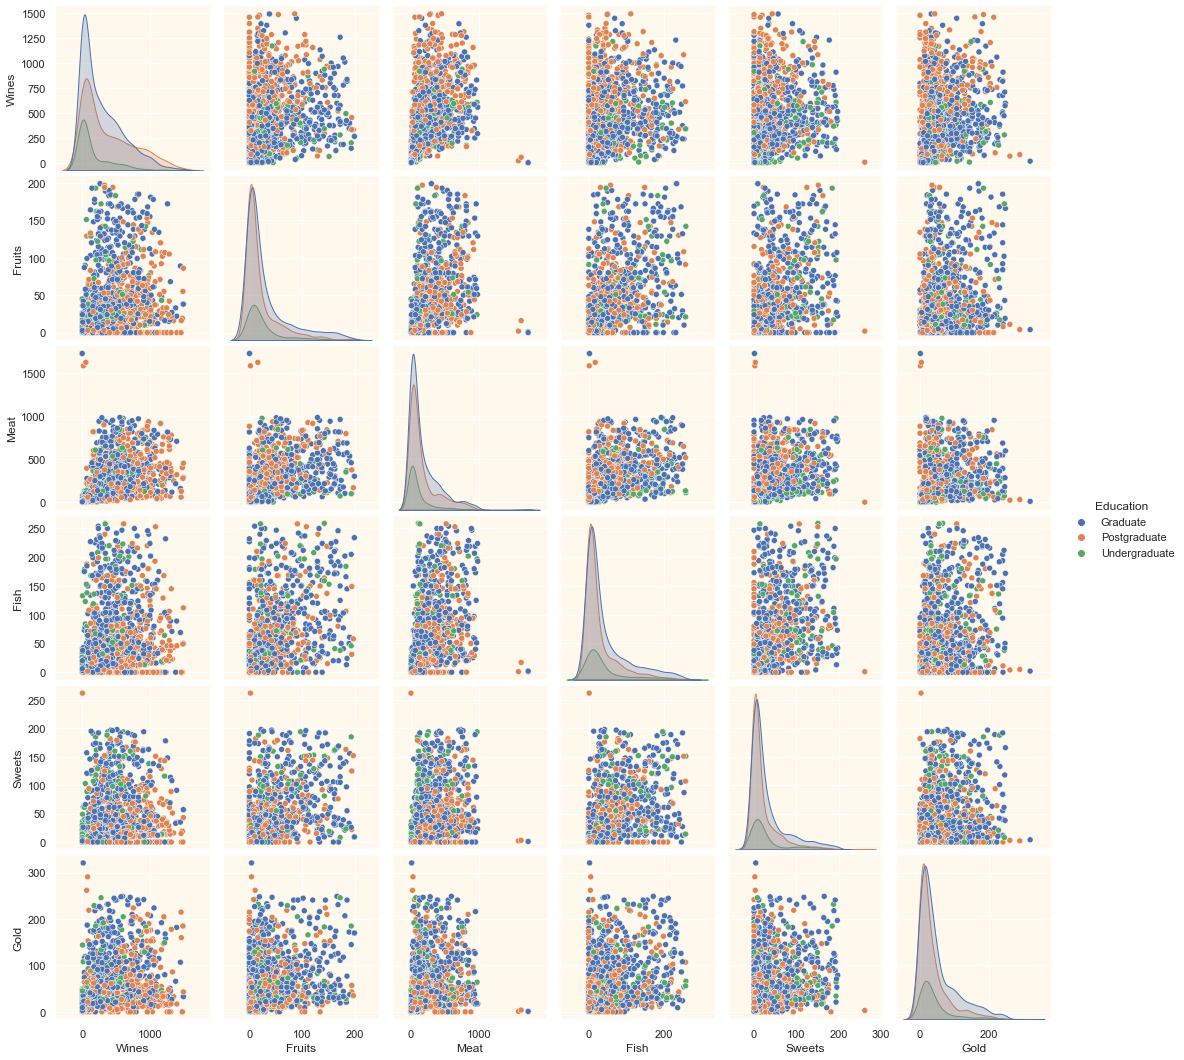

In [29]:
sns.set( rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#fff"})
pallet =['#2f4b7c', '#665191','#003f5c','#a05195','#870a65','#cf3759','#f95d6a']
cmap =colors.ListedColormap(['#2f4b7c', '#665191','#003f5c','#a05195','#870a65','#cf3759','#f95d6a'])
to_plot = ['Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Education']
plt.figure()
sns.pairplot(data_clean[to_plot], hue='Education')
plt.show()

Text(0.5, 1.0, 'Costumer age Distribution')

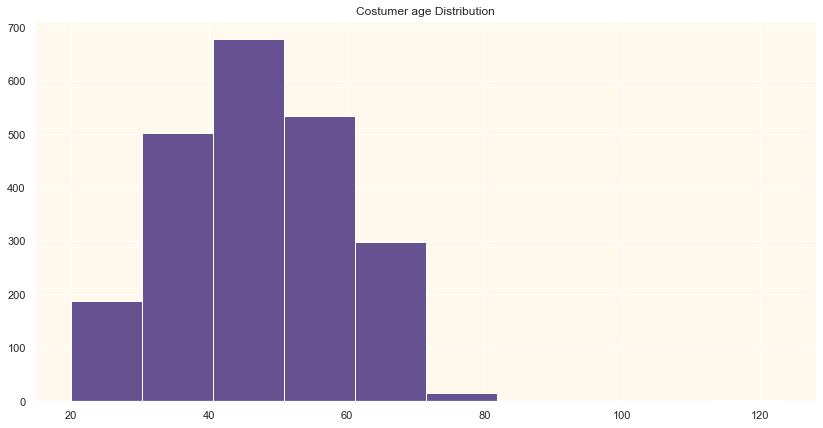

In [31]:
#costmer age distribution
fig ,ax = plt.subplots(figsize=(14,7))
ax.hist(data_clean['Costmer_age'], color='#665191')
ax.set_title('Costumer age Distribution')

In [32]:
data_clean['Costmer_age'].describe()

count    2216.000000
mean       47.179603
std        11.985554
min        20.000000
25%        39.000000
50%        46.000000
75%        57.000000
max       123.000000
Name: Costmer_age, dtype: float64

In [170]:
print("Minimim age is ", data_clean['Costmer_age'].min())
print('Maximum age is ' ,data_clean['Costmer_age'].max())
print('Average age is ',data_clean['Costmer_age'].mean())
print('Meadian age is ',data_clean['Costmer_age'].median())

Minimim age is  20
Maximum age is  123
Average age is  47.17960288808664
Meadian age is  46.0


Create an age group to study how various age groups behave while making purchases.
The first group in this section is the age group currently under 30 years old as young, the second group is the age group between 31 and 45 years old as adults, the third group is the age group between 45 and 60 years old, and the fifth group is the age group beyond 60 years old.

In [33]:
#create conditions 
data_clean['Costmer_age']= pd.to_numeric(data_clean['Costmer_age'])
age_conditions= [(data_clean['Costmer_age']<30),
                (data_clean['Costmer_age']>=30) & (data_clean['Costmer_age']<=45),
               (data_clean['Costmer_age']>=45) & (data_clean['Costmer_age']<=60),
                (data_clean['Costmer_age']>60)  ]
Values_age =['Young', 'Adult', 'senior', 'Elder']

data_clean['Age_group']= np.select(age_conditions, Values_age)

In [35]:
#amount spend by different age group

two_grouper('Age_group', 'Ammount_spent')

,Age_group,Ammount_spent
0,Adult,471894
1,Elder,270660
2,Young,99365
3,senior,503360


In [ ]:
#create dataframe to analyze item purchasing amoung different type of age group

In [52]:
p_age=data_clean.groupby('Age_group')['Wines','Fruits', 'Meat', 'Fish', 'Sweets'].sum().reset_index()
p_ed=data_clean.groupby('Education')['Wines','Fruits', 'Meat', 'Fish', 'Sweets'].sum().reset_index()
p_ed

,Education,Wines,Fruits,Meat,Fish,Sweets
0,Graduate,318111,34441,201319,48453,34915
1,Postgraduate,317412,17492,141110,24423,17382
2,Undergraduate,40560,6472,27634,10529,7599


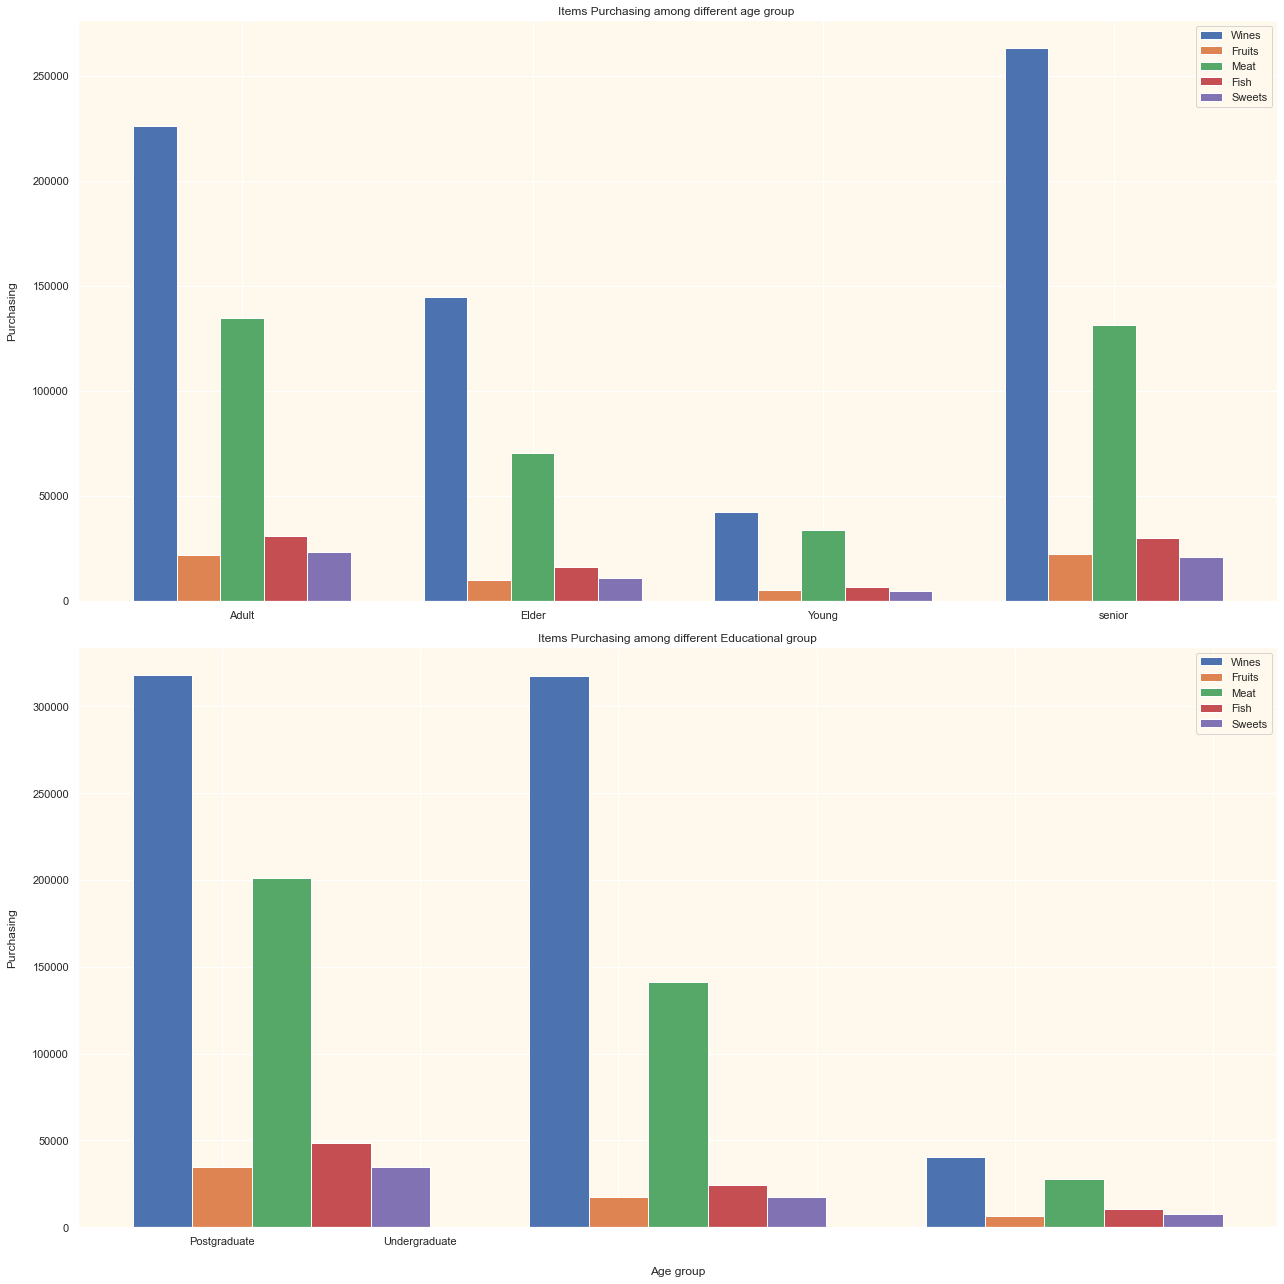

In [62]:
fig, ax= plt.subplots(2,1,figsize=(18,18))
x= np.arange(len(p_age['Age_group'].unique()))
x2=np.arange(len(p_ed['Education'].unique()))
bar_width= 0.15
ax[0].bar(x -bar_width, list(p_age['Wines']),bar_width, label='Wines' )
ax[0].bar(x , p_age['Fruits'],bar_width, label='Fruits')
ax[0].bar(x + (1*bar_width), p_age['Meat'],bar_width, label= 'Meat')
ax[0].bar(x + (2*bar_width), p_age['Fish'],bar_width, label= 'Fish')
ax[0].bar(x + (3*bar_width), p_age['Sweets'],bar_width, label='Sweets')
ax[0].set_xticks(x+ bar_width)
ax[0].set_xticklabels(p_age['Age_group'])
ax[0].legend()
ax[0].set_title('Items Purchasing among different age group ')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('Purchasing', labelpad=15)
#ax[0].set_xlabel('Age group', labelpad=20)

      
ax[1].bar(x2 - bar_width, list(p_ed['Wines']),bar_width, label='Wines' )
ax[1].bar(x2 , p_ed['Fruits'],bar_width, label='Fruits')
ax[1].bar(x2 + (1*bar_width),p_ed['Meat'],bar_width, label= 'Meat')
ax[1].bar(x2 + (2*bar_width), p_ed['Fish'],bar_width, label= 'Fish') 
ax[1].bar(x2 + (3*bar_width), p_ed['Sweets'],bar_width, label= 'Sweets') 
ax[1].set_xticklabels(p_ed['Education'])
ax[1].legend()
ax[1].set_title('Items Purchasing among different Educational group')
ax[1].set_ylabel('Purchasing', labelpad=15)
ax[1].set_xlabel('Age group', labelpad=20)

fig.tight_layout()

### Let us examine the spending and purchasing patterns of various family groups.

In [95]:
#lest count each famli group contains how many members
nu_f_member=data_clean['Familiy_size'].value_counts().reset_index()
nu_f_member.rename(columns={'index':'Familiy_size', 'Familiy_size':'Family_nos'} , inplace=True)
nu_f_member

,Familiy_size,Family_nos
0,3,880
1,2,757
2,4,296
3,1,252
4,5,31


In [98]:
#using function created before
family_size_spending=two_grouper('Familiy_size','Ammount_spent')
family_size_spending

,Familiy_size,Ammount_spent
0,1,279022
1,2,594315
2,3,389808
3,4,72864
4,5,9270


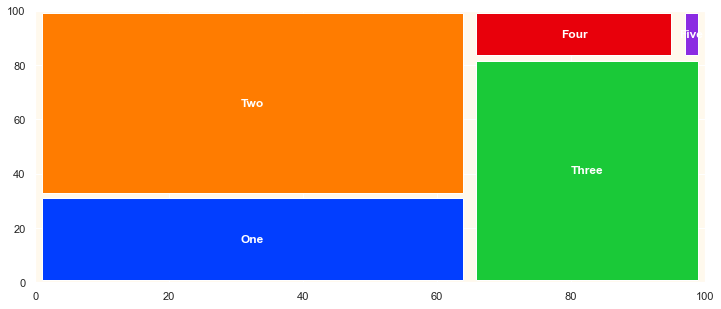

In [83]:
fig=plt.figure(figsize=(12,5))

squarify.plot(sizes=family_size_spending['Ammount_spent'],
             label=['One', 'Two','Three', 'Four', 'Five'], 
             pad=0.2, text_kwargs={'fontsize':12,'color':'white', 'weight':'bold'},
             color =sns.color_palette('bright', len(family_size_spending['Ammount_spent'])))
plt.show()

In [99]:
# find average spending per family

fm_spending=pd.merge(family_size_spending,nu_f_member, how='left', on='Familiy_size')
fm_spending

,Familiy_size,Ammount_spent,Family_nos
0,1,279022,252
1,2,594315,757
2,3,389808,880
3,4,72864,296
4,5,9270,31


Text(0.5, 0, 'Family group')

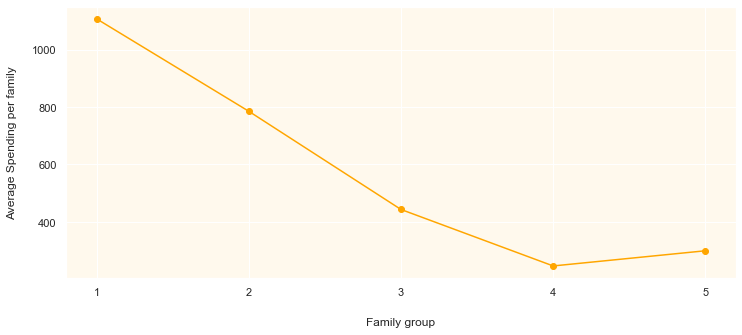

In [110]:
fm_spending['Average_spend']=fm_spending['Ammount_spent']/fm_spending['Family_nos']


fig,ax=plt.subplots(figsize=(12,5))
ax.plot(fm_spending['Familiy_size'],fm_spending['Average_spend'], 'o-' ,color='#ffa600')
ax.set_xticks(fm_spending['Familiy_size'])
ax.set_ylabel('Average Spending per family', labelpad=15)
ax.set_xlabel('Family group', labelpad=20)

In [161]:
data_clean.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'No_days',
       'Costmer_age', 'Ammount_spent', 'Living_with', 'Children',
       'Familiy_size', 'Is_parent', 'Age_group'],
      dtype='object')

In [155]:
fm_spending

,Familiy_size,Ammount_spent,Family_nos,Average_spend
0,1,279022,252,1107.230159
1,2,594315,757,785.092470
2,3,389808,880,442.963636
3,4,72864,296,246.162162
4,5,9270,31,299.032258


As shown in the graph above, average spending is falling as the number of children increases.

In [111]:
#How many time each group purchase certain item
pch_counts=data_clean.groupby('Familiy_size')['Wines','Fruits', 'Meat', 'Fish', 'Sweets'].count().reset_index()
pch_counts

,Familiy_size,Wines,Fruits,Meat,Fish,Sweets
0,1,252,252,252,252,252
1,2,757,757,757,757,757
2,3,880,880,880,880,880
3,4,296,296,296,296,296
4,5,31,31,31,31,31


In [144]:
# How many time each group purchase certain item
f_selected_items=data_clean.groupby('Familiy_size')['Wines','Fruits', 'Meat', 'Fish', 'Sweets'].sum().reset_index()
f_selected_items

,Familiy_size,Wines,Fruits,Meat,Fish,Sweets
0,1,123782,13180,93570,18730,13525
1,2,284002,27404,175833,40008,27350
2,3,218975,15287,83748,21310,16380
3,4,43157,2339,14944,3143,2520
4,5,6167,195,1968,214,121


In [152]:
color_list[1]

'#2f4b7c'

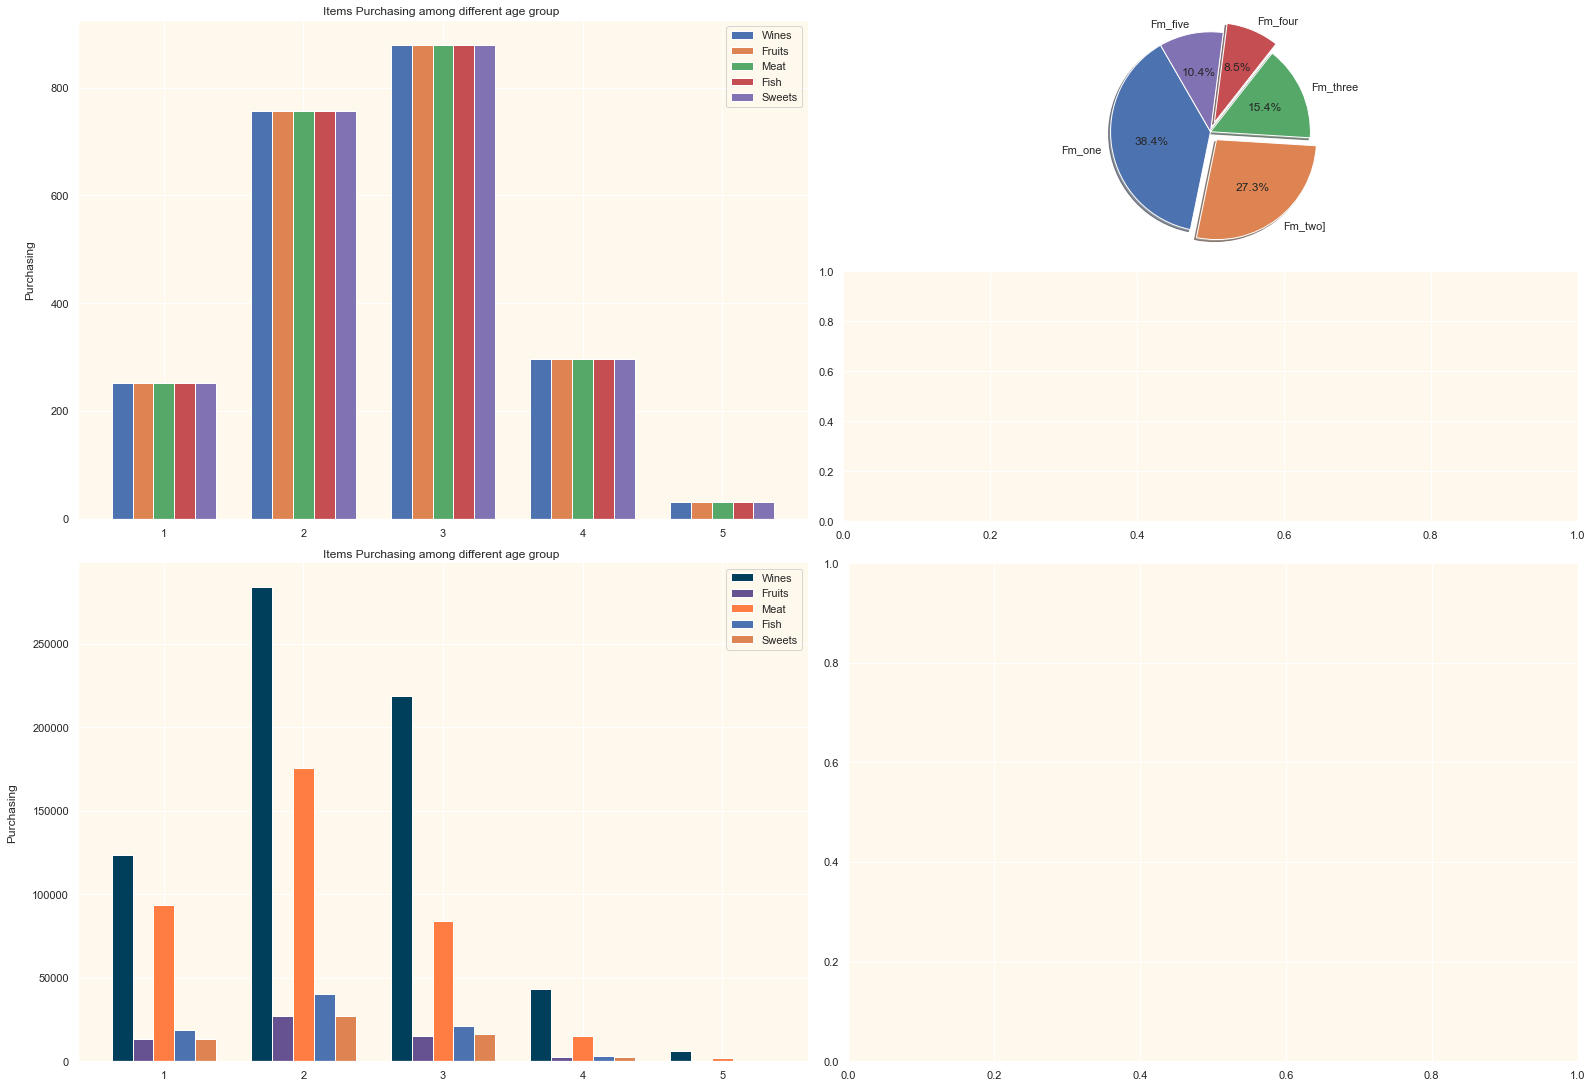

In [160]:
#color_list =['#003f5c','#2f4b7c','#665191','#a05195,''#d45087','#f95d6a' '#ff7c43','#ffa600']
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained", figsize=(22,15))

#axd['upper left'].plot(fm_spending['Familiy_size'],fm_spending['Average_spend'], 'o-' ,color='#ffa600')

x= np.arange(len(pch_counts['Familiy_size'].unique()))

bar_width= 0.15
axd['upper left'].bar(x -bar_width, list(pch_counts['Wines']),bar_width, label='Wines' )
axd['upper left'].bar(x , pch_counts['Fruits'],bar_width, label='Fruits')
axd['upper left'].bar(x + (1*bar_width), pch_counts['Meat'],bar_width, label= 'Meat')
axd['upper left'].bar(x + (2*bar_width), pch_counts['Fish'],bar_width, label= 'Fish')
axd['upper left'].bar(x + (3*bar_width), pch_counts['Sweets'],bar_width, label='Sweets')
axd['upper left'].set_xticks(x+ bar_width)
axd['upper left'].set_xticklabels(pch_counts['Familiy_size'])
axd['upper left'].legend()
axd['upper left'].set_title('Items Purchasing among different age group ')
axd['upper left'].spines['top'].set_visible(False)
axd['upper left'].spines['right'].set_visible(False)
axd['upper left'].set_ylabel('Purchasing', labelpad=15)




x2= np.arange(len(f_selected_items['Familiy_size'].unique()))

bar_width= 0.15
axd['lower left'].bar(x2 -bar_width, f_selected_items['Wines'],bar_width, color='#003f5c', label='Wines' )
axd['lower left'].bar(x2 , f_selected_items['Fruits'],bar_width, label='Fruits',color='#665191')
axd['lower left'].bar(x2 + (1*bar_width), f_selected_items['Meat'],bar_width, label= 'Meat',color='#ff7c43')
axd['lower left'].bar(x2 + (2*bar_width), f_selected_items['Fish'],bar_width, label= 'Fish')
axd['lower left'].bar(x2 + (3*bar_width), f_selected_items['Sweets'],bar_width, label='Sweets')
axd['lower left'].set_xticks(x+ bar_width)
axd['lower left'].set_xticklabels(pch_counts['Familiy_size'])
axd['lower left'].legend()
axd['lower left'].set_title('Items Purchasing among different age group ')
axd['lower left'].spines['top'].set_visible(False)
axd['lower left'].spines['right'].set_visible(False)
axd['lower left'].set_ylabel('Purchasing', labelpad=15)

#plot Pie Chart for average spending

pie_labeles=['Fm_one','Fm_two]','Fm_three','Fm_four', 'Fm_five']
explodes = [0,0.1, 0,0.1, 0]
axd['innerA'].pie(fm_spending['Average_spend'],
                 labels =pie_labeles,explode=explodes,
                  autopct='%1.1f%%',
                 shadow=True,startangle=120)


plt.show()
